In [4]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [5]:

# Carregar a base de dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colunas = ["Num_Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=colunas)

In [6]:
# Exibir os primeiros registros
print("Visualização dos primeiros registros da base de dados:")
print(df.head())

Visualização dos primeiros registros da base de dados:
   Num_Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0                6      148             72             35        0  33.6   
1                1       85             66             29        0  26.6   
2                8      183             64              0        0  23.3   
3                1       89             66             23       94  28.1   
4                0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:

# Análise Estatística
print("\nAnálise estatística básica da base de dados:")
print(df.describe())


Análise estatística básica da base de dados:
       Num_Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count       768.000000  768.000000     768.000000     768.000000  768.000000   
mean          3.845052  120.894531      69.105469      20.536458   79.799479   
std           3.369578   31.972618      19.355807      15.952218  115.244002   
min           0.000000    0.000000       0.000000       0.000000    0.000000   
25%           1.000000   99.000000      62.000000       0.000000    0.000000   
50%           3.000000  117.000000      72.000000      23.000000   30.500000   
75%           6.000000  140.250000      80.000000      32.000000  127.250000   
max          17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160      

In [8]:
# Verificar valores ausentes
print("\nVerificação de valores ausentes:")
print(df.isnull().sum())


Verificação de valores ausentes:
Num_Pregnancies             0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


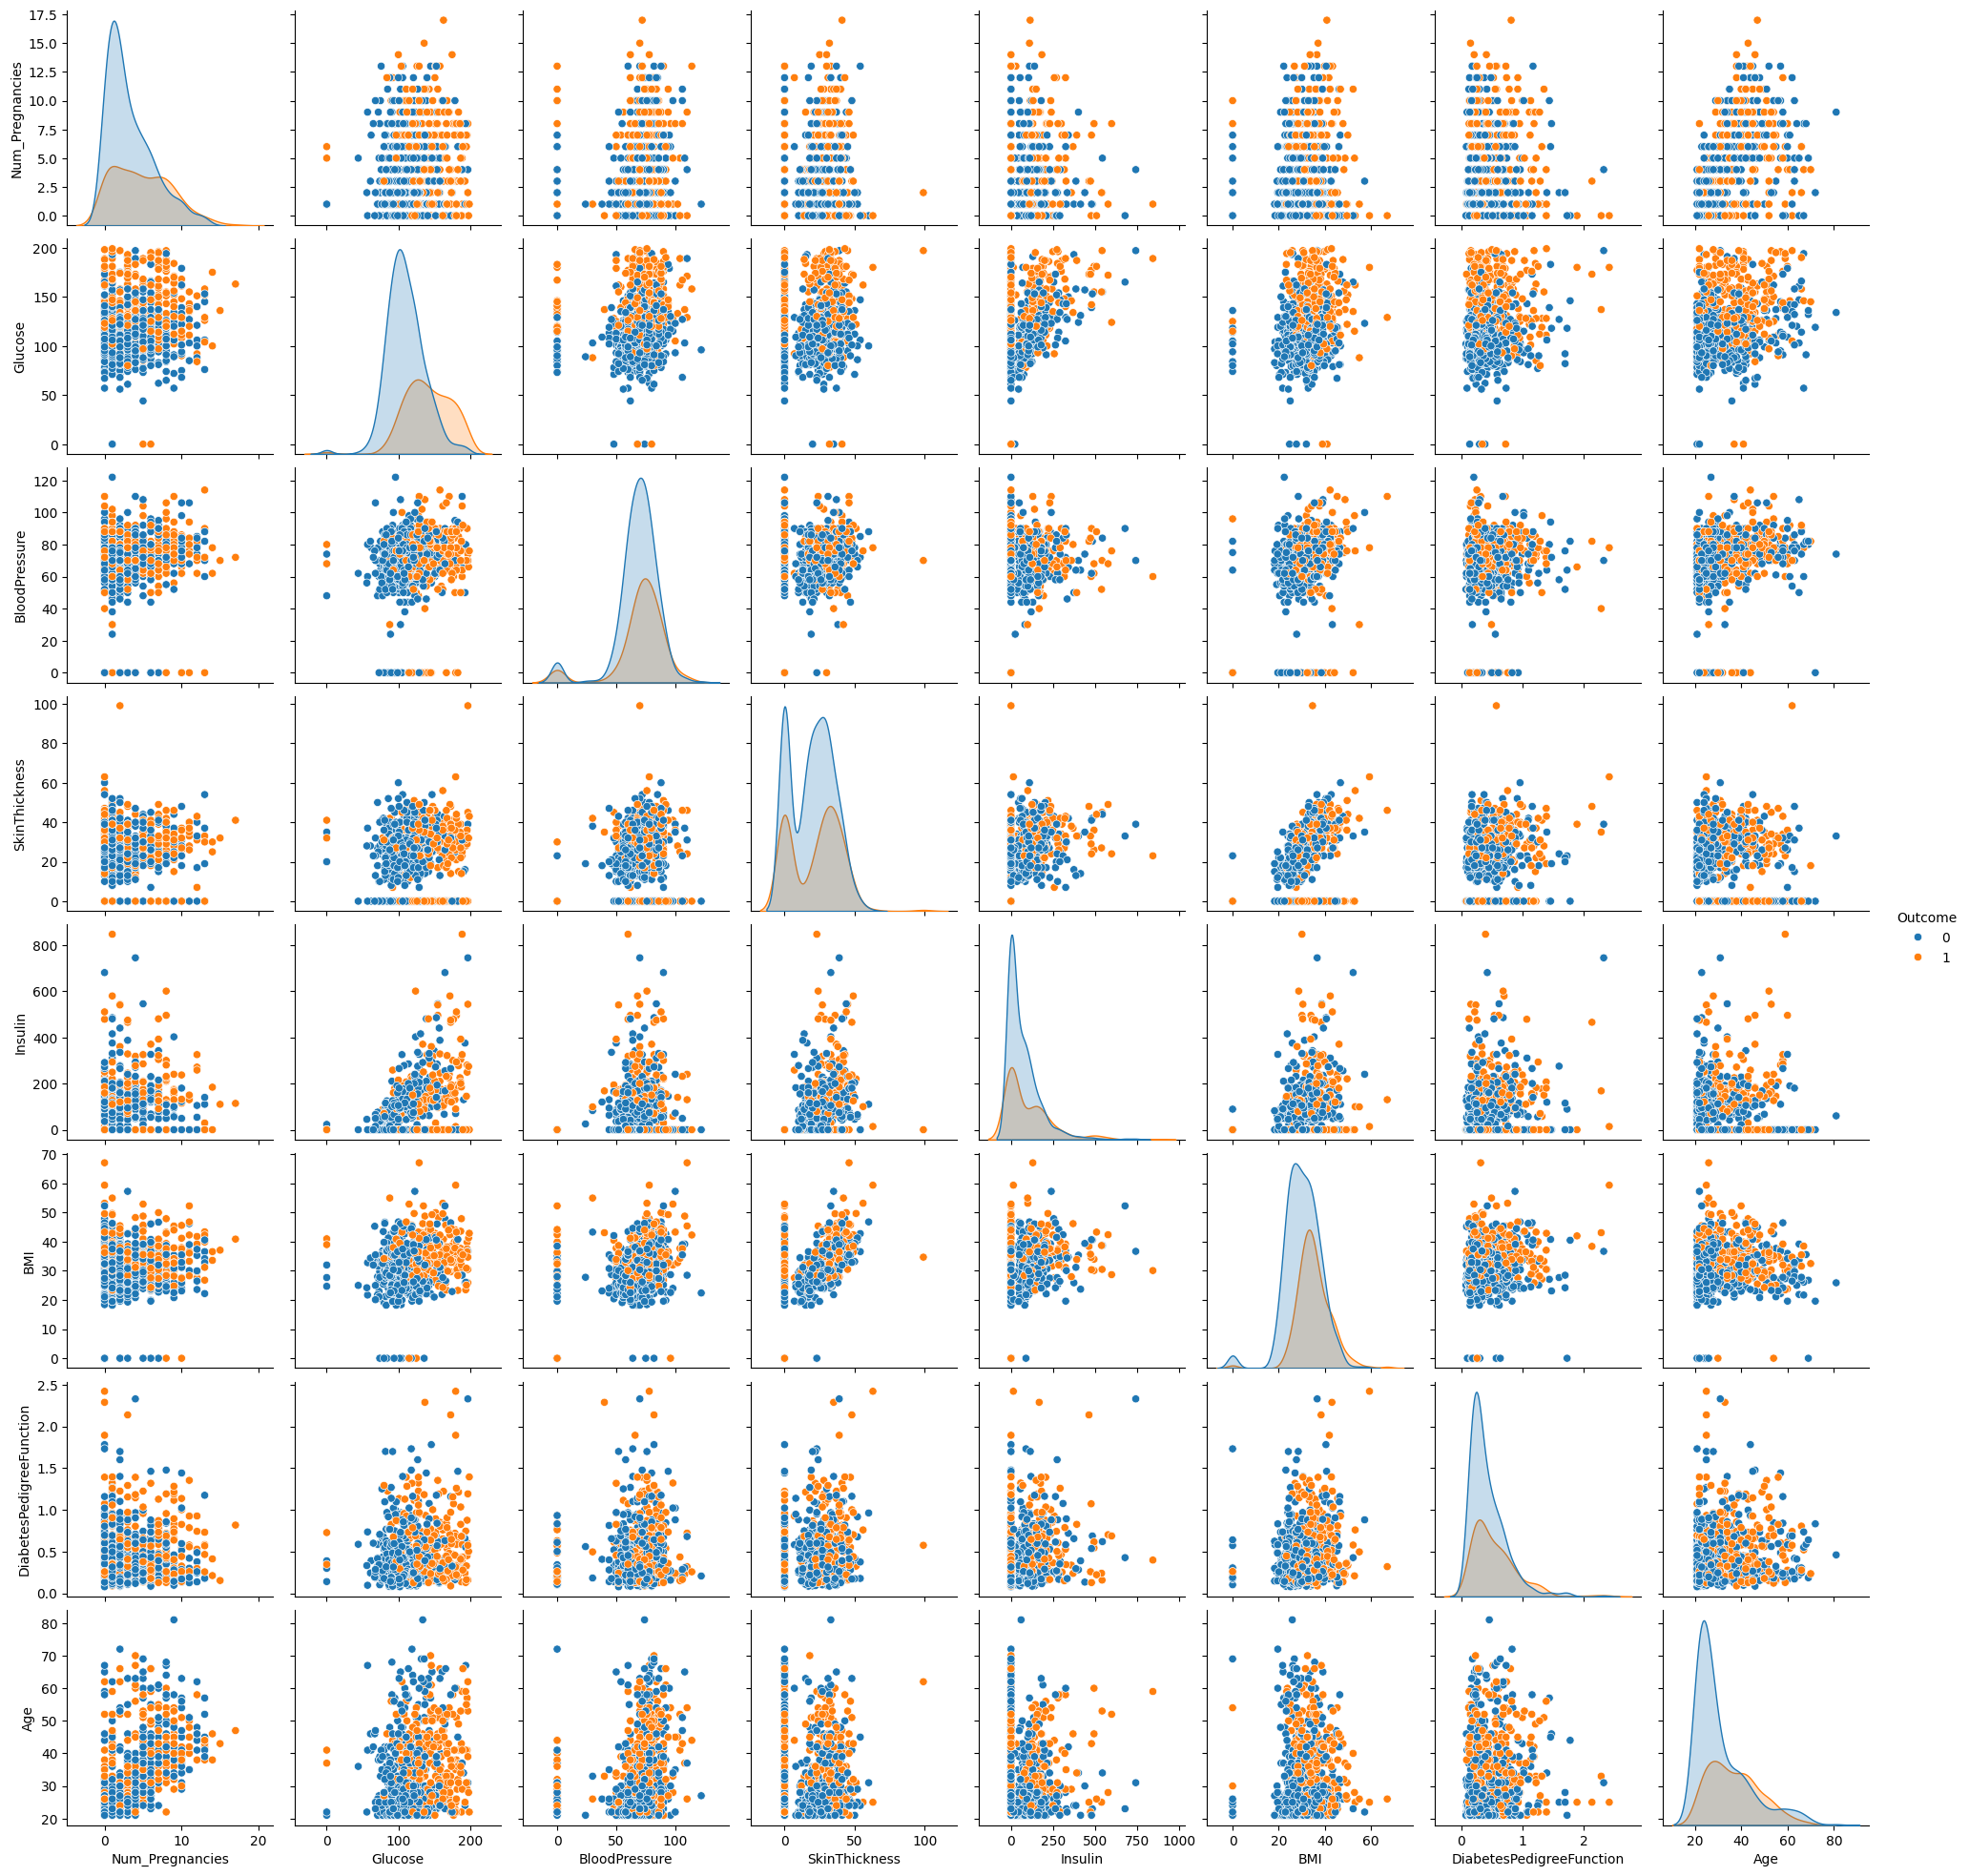

In [9]:
# Visualização dos dados
sns.pairplot(df, hue="Outcome")
plt.show()

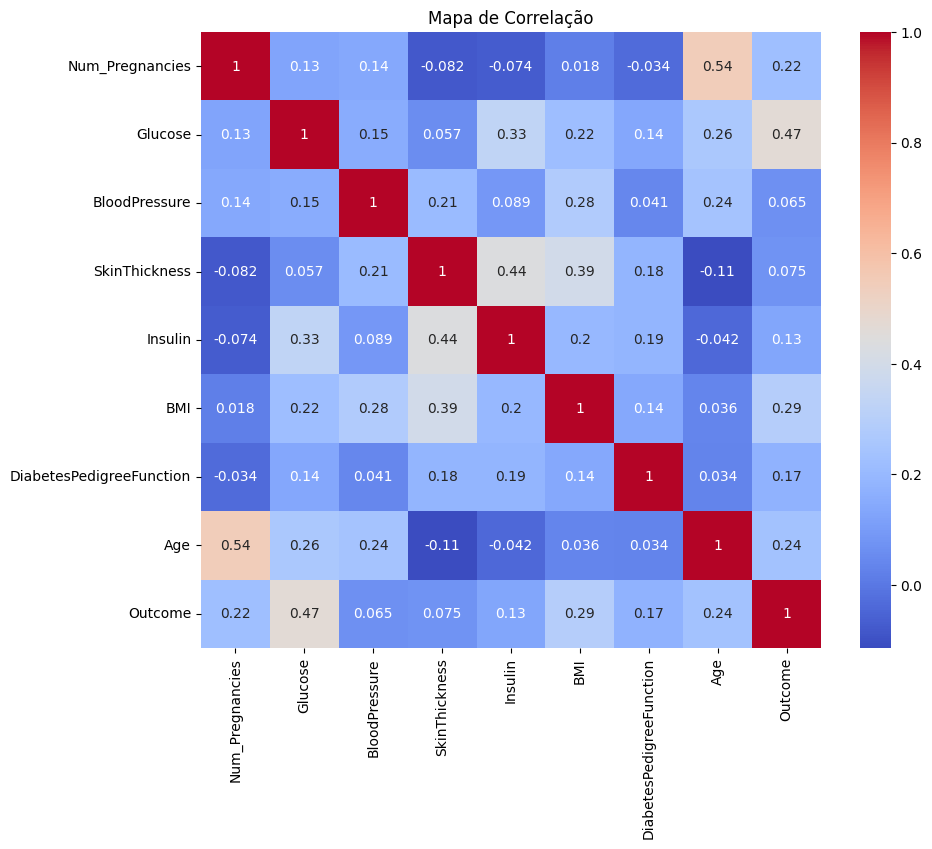

In [10]:
# Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação")
plt.show()

In [11]:
# Separação entre Features e Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# Modelo de Machine Learning
print("\nTreinando o modelo Random Forest...")
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)



Treinando o modelo Random Forest...


RandomForestClassifier(random_state=42)

In [14]:
# Previsões
y_pred = modelo.predict(X_test)


In [15]:
# Avaliação do Modelo
print("\nMétricas de avaliação:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Métricas de avaliação:
Acurácia: 0.75

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



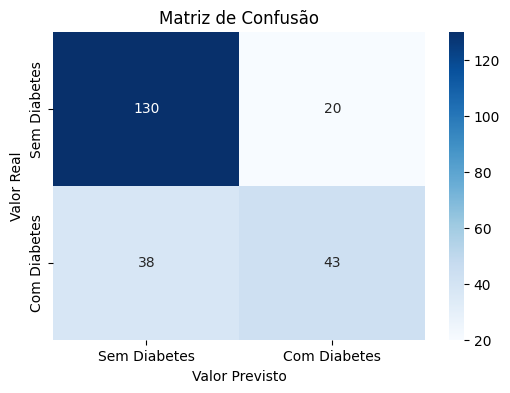

In [16]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Diabetes", "Com Diabetes"], yticklabels=["Sem Diabetes", "Com Diabetes"])
plt.title("Matriz de Confusão")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")
plt.show()